<a href="https://colab.research.google.com/github/Sharikarajan07/Python-Data-Analysis-/blob/main/GTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


In [7]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv.zip", encoding='ISO-8859-1')
print(df)

/tmp/ipython-input-7-170897136.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/globalterrorismdb_0718dist.csv.zip", encoding='ISO-8859-1')


             eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            5

In [8]:
print(df.shape)
print(df.columns)


(181691, 135)
Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [10]:
df.head()

#df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
#select and rename
df = df[['iyear', 'country_txt', 'region_txt', 'attacktype1_txt',
         'weaptype1_txt', 'nkill', 'nwound', 'gname', 'targtype1_txt', 'city']]
df.columns = ['Year', 'Country', 'Region', 'AttackType', 'WeaponType',
              'Killed', 'Wounded', 'Group', 'TargetType', 'City']


In [14]:
print(df.columns.tolist())


['Year', 'Country', 'Region', 'AttackType', 'WeaponType', 'Killed', 'Wounded', 'Group', 'TargetType', 'City']


In [ ]:
#Data cleaning
df['Killed'].fillna(0, inplace=True)
df['Wounded'].fillna(0, inplace=True)
df.head()


,Year,Country,Region,AttackType,WeaponType,Killed,Wounded,Group,TargetType,City
0,1970,Dominican Republic,Central America & Caribbean,Assassination,Unknown,1.0,0.0,MANO-D,Private Citizens & Property,Santo Domingo
1,1970,Mexico,North America,Hostage Taking (Kidnapping),Unknown,0.0,0.0,23rd of September Communist League,Government (Diplomatic),Mexico city
2,1970,Philippines,Southeast Asia,Assassination,Unknown,1.0,0.0,Unknown,Journalists & Media,Unknown
3,1970,Greece,Western Europe,Bombing/Explosion,Explosives,0.0,0.0,Unknown,Government (Diplomatic),Athens
4,1970,Japan,East Asia,Facility/Infrastructure Attack,Incendiary,0.0,0.0,Unknown,Government (Diplomatic),Fukouka


In [ ]:
df.dropna(subset=['City'], inplace=True)

In [19]:
df['Casualties'] = df['Killed'] + df['Wounded']
df.head()

,Year,Country,Region,AttackType,WeaponType,Killed,Wounded,Group,TargetType,City,Casualties
0,1970,Dominican Republic,Central America & Caribbean,Assassination,Unknown,1.0,0.0,MANO-D,Private Citizens & Property,Santo Domingo,1.0
1,1970,Mexico,North America,Hostage Taking (Kidnapping),Unknown,0.0,0.0,23rd of September Communist League,Government (Diplomatic),Mexico city,0.0
2,1970,Philippines,Southeast Asia,Assassination,Unknown,1.0,0.0,Unknown,Journalists & Media,Unknown,1.0
3,1970,Greece,Western Europe,Bombing/Explosion,Explosives,NaN,NaN,Unknown,Government (Diplomatic),Athens,NaN
4,1970,Japan,East Asia,Facility/Infrastructure Attack,Incendiary,NaN,NaN,Unknown,Government (Diplomatic),Fukouka,NaN


In [16]:
#Data visualization
top_countries = df['Country'].value_counts().head(10)
print(top_countries)

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Countries by Number of Attacks')

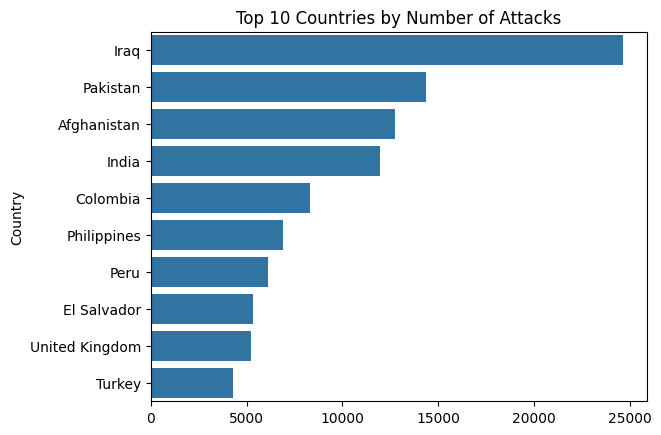

In [17]:
#Barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 10 Countries by Number of Attacks")


In [ ]:
#lineplot
yearly_attacks = df['Year'].value_counts().sort_index()
print(yearly_attacks)

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2704
2007     3215
2008     4714
2009     4569
2010     4762
2011     5029
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64


Text(0, 0.5, 'Number of Attacks')

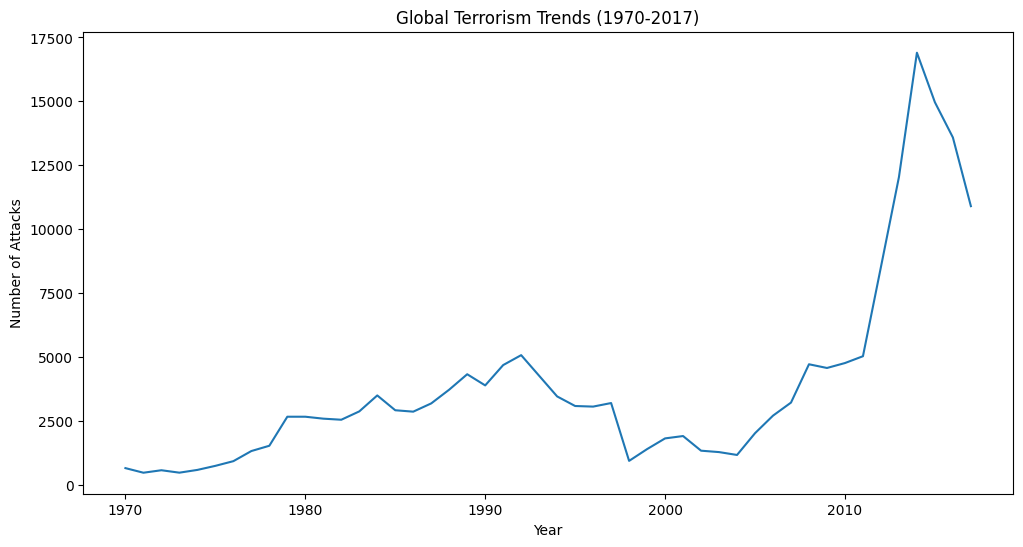

In [ ]:
#Data Visualization
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_attacks.index, y=yearly_attacks.values)
plt.title("Global Terrorism Trends (1970-2017)")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")


In [20]:
#Statistical Analysis
df.groupby('AttackType')['Casualties'].mean().sort_values(ascending=False)


,Casualties
AttackType,
Hijacking,35.045840
Unarmed Assault,16.147380
Hostage Taking (Barricade Incident),8.908115
Unknown,6.486407
Bombing/Explosion,6.232296
Armed Assault,5.552720
Hostage Taking (Kidnapping),2.533692
Assassination,2.070963
Facility/Infrastructure Attack,0.652665


In [23]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(df['AttackType'], df['Region'])
print(ct)

Region                               Australasia & Oceania  \
AttackType                                                   
Armed Assault                                           51   
Assassination                                           36   
Bombing/Explosion                                       75   
Facility/Infrastructure Attack                          71   
Hijacking                                                3   
Hostage Taking (Barricade Incident)                      6   
Hostage Taking (Kidnapping)                             13   
Unarmed Assault                                         11   
Unknown                                                 16   

Region                               Central America & Caribbean  \
AttackType                                                         
Armed Assault                                               4361   
Assassination                                               1254   
Bombing/Explosion                            

In [24]:
chi2, p, dof, expected = chi2_contingency(ct)
print(f"p-value: {p}")


p-value: 0.0


In [26]:
#Predictive modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [35]:
df_model = df[['Region', 'WeaponType', 'AttackType']].dropna() # Creates a smaller dataset with only the required columns, removing rows with missing data.
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder() #Creates 3 encoders to convert text labels (Region, WeaponType, AttackType) to numeric format.
X = pd.DataFrame({
    'Region': le1.fit_transform(df_model['Region']),
    'Weapon': le2.fit_transform(df_model['WeaponType'])
})
y = le3.fit_transform(df_model['AttackType'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Splits the data into training (80%) and testing (20%) sets.


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(145352, 2)
(36339, 2)
(145352,)
(36339,)


In [38]:
model = RandomForestClassifier() # Creates and trains a Random Forest model, a popular and accurate machine learning algorithm.
model.fit(X_train, y_train)


y_pred = model.predict(X_test)  #Predicts attack types for test data, and prints the accuracy of the model.
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7872808827980957
